In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


Load Data

In [4]:
df = pd.read_csv('student_scores - student_scores.csv')
df.head()
df.describe()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


,0
Hours,0
Scores,0


Explore Data (EDA)

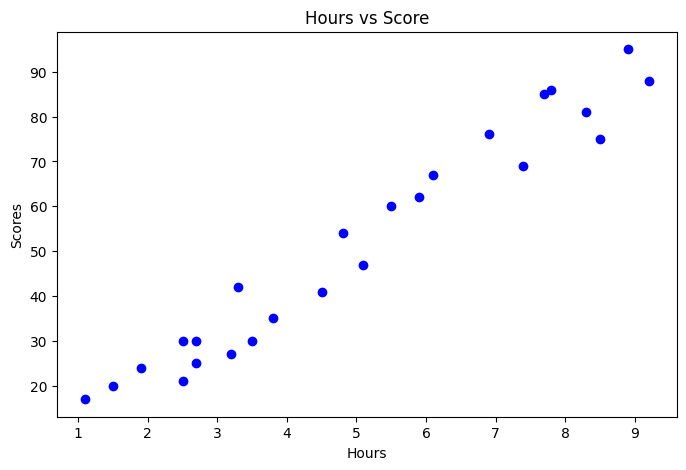

In [5]:
plt.figure(figsize=(8,5))
plt.scatter(df['Hours'],df['Scores'],color='blue')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Score')
plt.show()

Split Data

In [8]:
X = df[['Hours']]
Y = df['Scores']
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)


Train A model

In [12]:
model = LinearRegression()
model.fit(x_train,y_train)



LinearRegression()

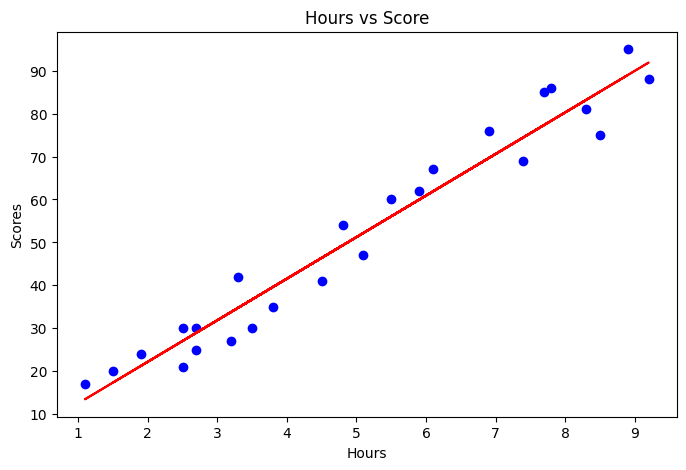

In [13]:
line  = model.coef_ * X  + model.intercept_

plt.figure(figsize=(8,5))
plt.scatter(X,Y, color='blue')
plt.plot(X,line, color='red')

plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Score')
plt.show()

Test and Evaluate

In [14]:
y_pred = model.predict(x_test)
print("MSE: ",mean_squared_error(y_test,y_pred))
print("R2 score: ",r2_score(y_test,y_pred))

MSE:  18.943211722315272
R2 score:  0.9678055545167994


In [16]:
print("Predict score: ",model.predict([[5.4]]))


Predict score:  [55.11011439]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [17]:
import joblib

joblib.dump(model, 'std_score_model.pkl')

load_model  = joblib.load('std_score_model.pkl')



